In [1]:
#importing dependencies
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
#understanding dataset
bdata=pd.read_csv('/content/car data.csv')
print(bdata)

    Car_Name  Year  Selling_Price  ...  Seller_Type  Transmission Owner
0       ritz  2014           3.35  ...       Dealer        Manual     0
1        sx4  2013           4.75  ...       Dealer        Manual     0
2       ciaz  2017           7.25  ...       Dealer        Manual     0
3    wagon r  2011           2.85  ...       Dealer        Manual     0
4      swift  2014           4.60  ...       Dealer        Manual     0
..       ...   ...            ...  ...          ...           ...   ...
296     city  2016           9.50  ...       Dealer        Manual     0
297     brio  2015           4.00  ...       Dealer        Manual     0
298     city  2009           3.35  ...       Dealer        Manual     0
299     city  2017          11.50  ...       Dealer        Manual     0
300     brio  2016           5.30  ...       Dealer        Manual     0

[301 rows x 9 columns]


In [3]:
bdata.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
bdata.Car_Name.value_counts()

city                      26
corolla altis             16
verna                     14
fortuner                  11
brio                      10
                          ..
etios gd                   1
Hero Honda CBZ extreme     1
Hero Hunk                  1
vitara brezza              1
s cross                    1
Name: Car_Name, Length: 98, dtype: int64

In [5]:
pd.options.display.float_format='Rs {:,.2f}L'.format
bdata.loc[bdata.Selling_Price.notnull()].groupby('Car_Name').Selling_Price.agg([sum,'mean','count'])

,sum,mean,count
Car_Name,,,
800,Rs 0.35L,Rs 0.35L,1
Activa 3g,Rs 0.62L,Rs 0.31L,2
Activa 4g,Rs 0.40L,Rs 0.40L,1
Bajaj ct 100,Rs 0.18L,Rs 0.18L,1
Bajaj Avenger 150,Rs 0.75L,Rs 0.75L,1
...,...,...,...
sx4,Rs 18.95L,Rs 3.16L,6
verna,Rs 85.51L,Rs 6.11L,14
vitara brezza,Rs 9.25L,Rs 9.25L,1


In [6]:
newd=bdata.loc[bdata.Car_Name=='verna',['Selling_Price','Present_Price','Kms_Driven']]
newd

,Selling_Price,Present_Price,Kms_Driven
215,Rs 4.50L,Rs 9.40L,36100
218,Rs 6.45L,Rs 9.40L,45078
219,Rs 4.50L,Rs 9.40L,36000
223,Rs 8.25L,Rs 9.40L,61381
224,Rs 5.11L,Rs 9.40L,36198
228,Rs 4.95L,Rs 9.40L,60000
230,Rs 6.15L,Rs 9.40L,45000
231,Rs 9.25L,Rs 9.40L,15001
235,Rs 9.10L,Rs 9.40L,15141
238,Rs 4.80L,Rs 9.40L,60241


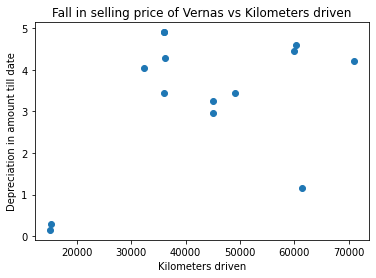

In [7]:
grplot=plt.figure()
gr=grplot.add_subplot()
gr.set_ylabel('Depreciation in amount till date')
gr.set_xlabel('Kilometers driven')
gr.set_title('Fall in selling price of Vernas vs Kilometers driven')
gr.scatter(newd.Kms_Driven,(newd.Present_Price-newd.Selling_Price))

In [8]:
np.shape(bdata)

(301, 9)

In [9]:
X = newd.iloc[:, 2].values.reshape(-1, 1)  # values converts it into a numpy array
Y = newd.iloc[:, 1].values.reshape(-1, 1)-newd.iloc[:, 0].values.reshape(-1, 1)

In [10]:
#regression

from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
#prediction
pred=reg.predict(X)

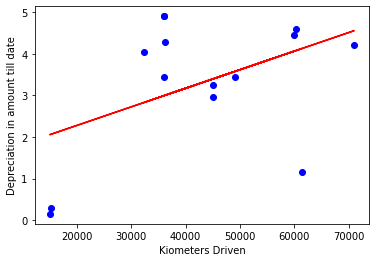

In [14]:
%matplotlib inline
plt.scatter(X,Y,color='blue')
plt.plot(X,pred,color='red')
plt.xlabel('Kiometers Driven')
plt.ylabel('Depreciation in amount till date')
plt.show()

In [16]:
#r_2 metric
from sklearn.metrics import r2_score
r2_score(pred,Y)

-2.74738462031368

In [17]:
#circumventing curve issue
from sklearn.preprocessing import PolynomialFeatures
#allow merging of models
from sklearn.pipeline import make_pipeline

In [18]:
model=make_pipeline(PolynomialFeatures(3),reg)

In [19]:
#fit the data
model.fit(X,Y)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [20]:
preds=model.predict(X)

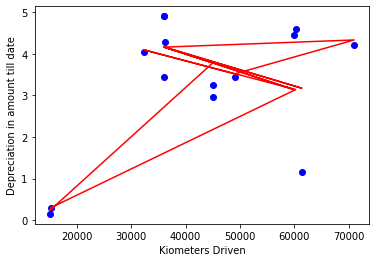

In [ ]:
%matplotlib inline
plt.scatter(X,Y,color='blue')
plt.plot(X,preds,color='red')
plt.xlabel('Kiometers Driven')
plt.ylabel('Depreciation in amount till date')
plt.show()

In [21]:
#prediction
r2_score(preds,Y)

0.553109688055738